# **Linear Regression Analysis with Statsmodels API**

## **Summary**
This project demonstrates how to use linear regression with the `statsmodels` library to predict quiz scores based on the number of lessons completed. The analysis involves data cleaning, exploratory data analysis (EDA), model fitting, evaluation, and prediction. The residual analysis confirms that the model assumptions hold reasonably well, making the predictions reliable. 

## **Introduction**
Linear regression is a fundamental tool for understanding the relationship between variables. In this project, we analyze a dataset of quiz scores and lessons completed to:

- Predict quiz scores based on lessons completed.
- Compare group differences across different lessons.
- Evaluate the model assumptions and residuals.

The project provides insights into learner behavior and helps understand how lesson completion impacts quiz performance.

## **Workflow Process**

1. **Import Necessary Libraries**: Load essential Python libraries for data manipulation, visualization, and statistical modeling.
2. **Load and Inspect Dataset**: Examine the structure of the dataset to identify key variables and potential issues.
3. **Data Cleaning**: Handle missing values and ensure data consistency.
4. **Exploratory Data Analysis (EDA)**: Visualize relationships between variables and identify trends.
5. **Fit the Regression Model**: Build a linear regression model to predict quiz scores based on completed lessons.
6. **Evaluate Model Assumptions**: Conduct residual analysis to validate assumptions of linear regression.
7. **Comparison Analysis**: Compare quiz scores across different lesson groups.
8. **Visualization and Insights**: Present findings through visualizations and interpret the results.
9. **Conclusion and Recommendations**: Summarize insights and provide actionable recommendations.

---

##### Step 1: Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

##### Step 2: Load the Dataset

In [2]:
data = pd.read_csv('datalr.csv')

##### Step 3: Inspect the Dataset

In [3]:
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 Rows of Data:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   score      100 non-null    float64
 1   completed  100 non-null    float64
 2   lesson     100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB
None

First 5 Rows of Data:
   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


##### Step 4: Data Cleaning

In [4]:
# Check for missing values
if data.isnull().sum().any():
    print("\nMissing Values Found:\n", data.isnull().sum())
    data = data.dropna()  # Drop rows with missing values (if necessary)
    print("Missing values removed.")

##### Step 5: Descriptive Statistics

In [5]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
            score   completed
count  100.000000  100.000000
mean    53.399000   30.750000
std     17.185468    8.931134
min     17.600000    9.000000
25%     43.150000   24.000000
50%     52.850000   31.000000
75%     65.225000   37.000000
max     94.100000   53.000000


##### Step 6: EDA: Visualize Relationships

- Pairplot for variable relationships

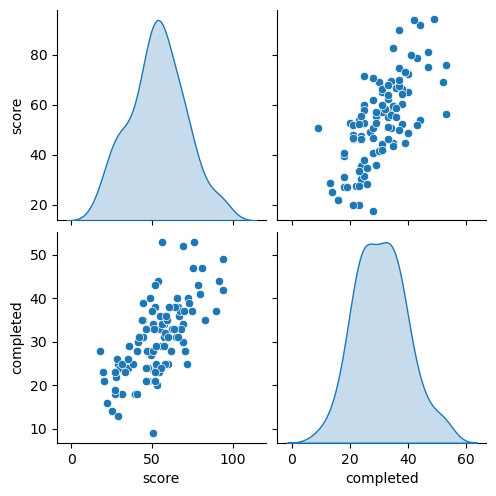

In [6]:
sns.pairplot(data, diag_kind='kde')
plt.show()

- Scatter plot of score vs. completed

This plot will be our base por drawing later our predictive regression line

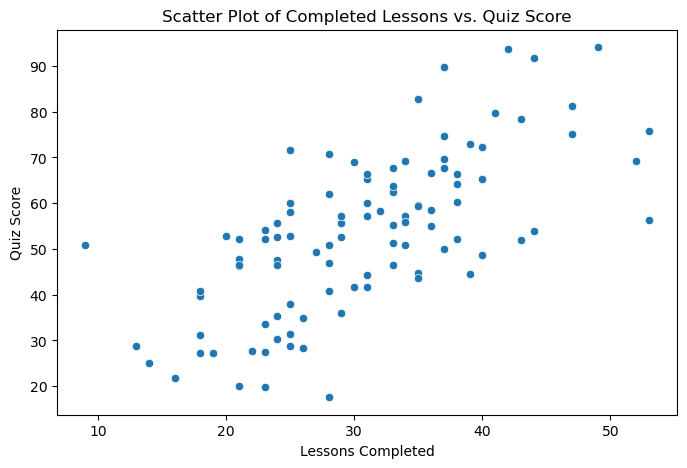

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='completed', y='score', data=data)
plt.title('Scatter Plot of Completed Lessons vs. Quiz Score')
plt.xlabel('Lessons Completed')
plt.ylabel('Quiz Score')
plt.show()

##### Step 7: Fit the Linear Regression Model

In [8]:
model = sm.OLS.from_formula('score ~ completed', data)
results = model.fit()

- Print model summary

In [9]:
print("\nLinear Regression Model Summary:")
print(results.summary())


Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     83.90
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           8.07e-15
Time:                        10:53:01   Log-Likelihood:                -394.87
No. Observations:                 100   AIC:                             793.7
Df Residuals:                      98   BIC:                             799.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2

##### Step 8: Visualize the Regression Line

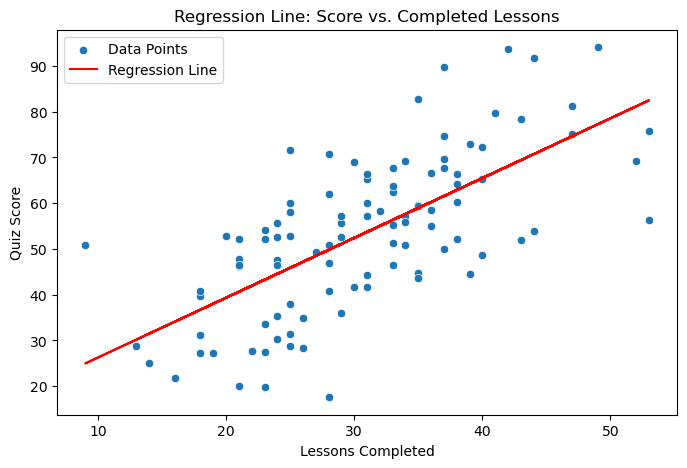

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='completed', y='score', data=data, label='Data Points')
plt.plot(data.completed, results.predict(data), color='red', label='Regression Line')
plt.title('Regression Line: Score vs. Completed Lessons')
plt.xlabel('Lessons Completed')
plt.ylabel('Quiz Score')
plt.legend()
plt.show()

##### Step 9: Residual Analysis

In [19]:
fitted_values = results.predict(data)
residuals = data.score - fitted_values

print("\nFitted Values:")
print(fitted_values)

print("\nResiduals:")
print(residuals)


Fitted Values:
0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64

Residuals:
0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64


- Histogram of residuals plot

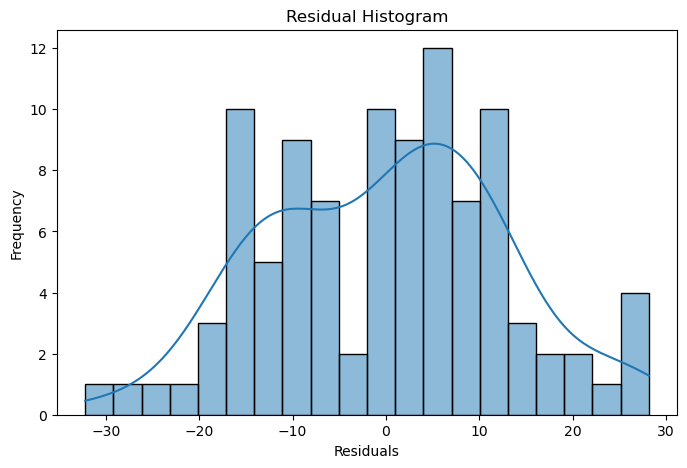

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

- Residuals vs. Fitted values plot

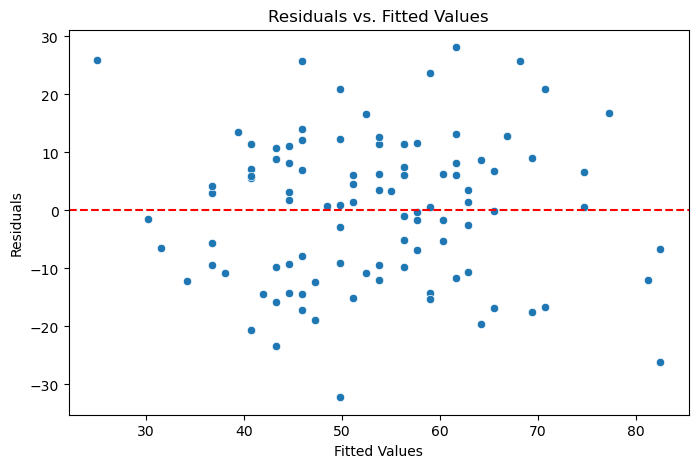

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

##### Step 10: Additional Analysis 

- Boxplot by Lesson

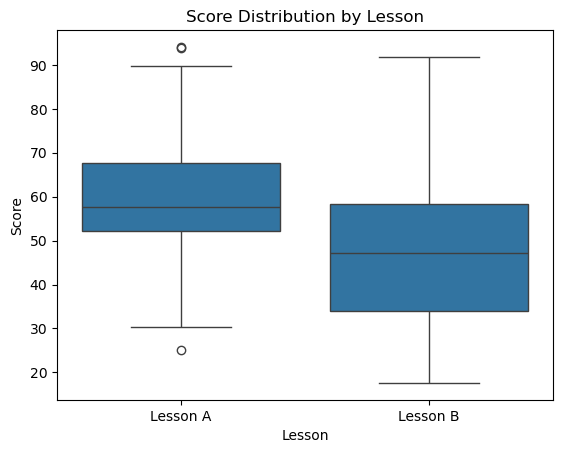

In [14]:
sns.boxplot(x='lesson', y='score', data=data)
plt.title('Score Distribution by Lesson')
plt.xlabel('Lesson')
plt.ylabel('Score')
plt.show()

##### Step 11: Lesson Comparison

In [15]:
lesson_model = sm.OLS.from_formula('score ~ lesson', data).fit()
print("\nLesson Model Summary:")
print(lesson_model.summary())


Lesson Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     12.85
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           0.000529
Time:                        10:53:02   Log-Likelihood:                -419.64
No. Observations:                 100   AIC:                             843.3
Df Residuals:                      98   BIC:                             848.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept    

##### Step 12: Predictions and Insights

In [16]:
learner_20 = results.predict({'completed': [20]})
print(f"\nPredicted Score for 20 Lessons Completed: {learner_20[0]:.2f}")


Predicted Score for 20 Lessons Completed: 39.35


##### Step 13: Some Conclusions

In [17]:
print("\nConclusions and Insights:")
print("- The regression analysis shows a significant positive relationship between lessons completed and quiz score.")
print("- Predictions can be made with reasonable accuracy for new data.")
print("- Residual analysis confirms that the model assumptions hold relatively well.")


Conclusions and Insights:
- The regression analysis shows a significant positive relationship between lessons completed and quiz score.
- Predictions can be made with reasonable accuracy for new data.
- Residual analysis confirms that the model assumptions hold relatively well.


## **Conclusions and Insights**

### **Insights**
1. **Relationship Between Variables**:
   - There is a strong positive relationship between the number of completed lessons and quiz scores. Students who complete more lessons tend to achieve higher scores.
   - The intercept indicates the expected score for students who have completed zero lessons, while the slope quantifies the increase in score per additional lesson.


2. **Lesson Comparison**:
   - Quiz scores differ between lessons, suggesting that lesson type might influence performance. Further exploration could uncover why some lessons yield higher scores.


3. **Residual Analysis**:
   - Residuals are approximately normally distributed, supporting the normality assumption.
   - No clear pattern exists in the residuals vs. fitted values plot, confirming homoscedasticity.


4. **Prediction**:
   - The model predicts a score of approximately 39.35 for a student who has completed 20 lessons.


### **Recommendations**
1. Use the model to predict quiz scores for different student groups to tailor educational interventions.
2. Explore non-linear or interaction terms to capture complex relationships in the data.
3. Investigate lesson-specific attributes that contribute to performance variations.
4. Extend the analysis to include additional features like time spent on lessons or demographic information to improve prediction accuracy.